# Locally Weighted Regression

1) Read and normalize the Dataset\
2) Generate W\
3) No Training is involved, directly make predictions using closed form solution we derived.\
 (X'WX)inv * X'WY
4) Find the best value of Tau(Bandwidth Parameter) [Cross Validation]

## Load Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dfx = pd.read_csv("dataset/weightedX.csv", header = None)
dfy = pd.read_csv("dataset/weightedY.csv", header = None)

In [6]:
dfx.head()

,0
0,1.24210
1,2.33480
2,0.13264
3,2.34700
4,6.73890


In [7]:
dfy.head()

,0
0,1.17180
1,1.88240
2,0.34283
3,2.10570
4,1.64770


In [8]:
# Creating arrays out of Dataframes

X = dfx.values
Y = dfy.values

In [9]:
X.shape, Y.shape

((100, 1), (100, 1))

## Normalization

In [11]:
mu = X.mean()
sigma = X.std()

X = (X - mu)/sigma

## Plot

[]

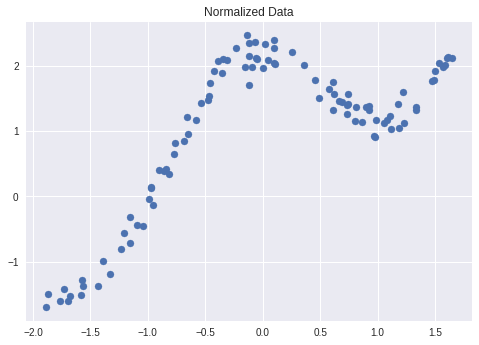

In [18]:
plt.style.use("seaborn")
plt.scatter(X, Y)
plt.title("Normalized Data")
plt.plot()

## Find out W \*_*

In [29]:
def get_W(query_point, x, tau):
    m = x.shape[0]
    W = np.mat(np.eye(m))
    
    for i in range(m):
        W[i,i] = np.exp(np.dot (x[i] - query_point, ( x[i] - query_point).T ) / ( -2 * tau * tau ))
    
    return W
        

In [30]:
# To make sure of matrix multiplication convert ndarry into matrix

X = np.mat(X)
Y = np.mat(Y)
m = X.shape[0]

W = get_W(-1, X,1)

In [32]:
W

matrix([[0.91623977, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.81081206, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.98296161, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.59578015, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.27234604,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.0831115 ]])